<a href="https://colab.research.google.com/github/yeoauqt/229351/blob/main/229351_LAB07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 6 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้น share แล้วส่ง link มาใน mango.cmu.ac.th

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้
https://donlapark.pages.dev/229351/data/Auto.csv
หรือรันโค้ดข้างล่าง

In [1]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# StatsModels
!pip install statsmodels --quiet
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Download the file
!wget https://donlapark.pages.dev/229351/data/Auto.csv

--2025-08-17 12:05:44--  https://donlapark.pages.dev/229351/data/Auto.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18079 (18K) [text/csv]
Saving to: ‘Auto.csv’

Auto.csv            100%[===================>]  17.66K  --.-KB/s    in 0s      

2025-08-17 12:05:44 (106 MB/s) - ‘Auto.csv’ saved [18079/18079]



In [2]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
auto = pd.read_csv('Auto.csv', na_values=["?"])

# ลบแถวที่มี missing values
auto = auto.dropna()

auto = auto.drop(['name', 'origin'],axis=1)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


# Linear model diagnosis

In [3]:
# simple linear regression on Auto dataset
auto_lr = smf.ols('mpg ~ horsepower ', data=auto).fit()
print(auto_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           7.03e-81
Time:                        12:06:07   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

### คำนวณ Residuals $y_i-\hat{y}_i$

In [4]:
#Fitted values
auto_fitted = auto_lr.predict(auto)

#Residuals
auto_res = auto['mpg']-auto_fitted

print(auto_res)

0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64


### หรือสามารถดึง predictions และ residuals จากโมเดลได้โดยตรง

In [5]:
# Fitted values
auto_fitted_ = auto_lr.fittedvalues

# Residuals
auto_res_ = auto_lr.resid

### 1. ทดสอบ non-linearity

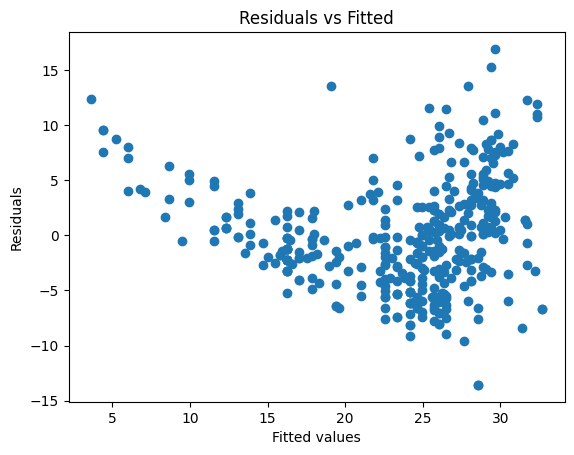

In [6]:
plt.scatter(auto_fitted, auto_res)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
392    26.361214
393    31.727935
394    26.676903
395    27.466127
396    26.992593
Length: 392, dtype: float64


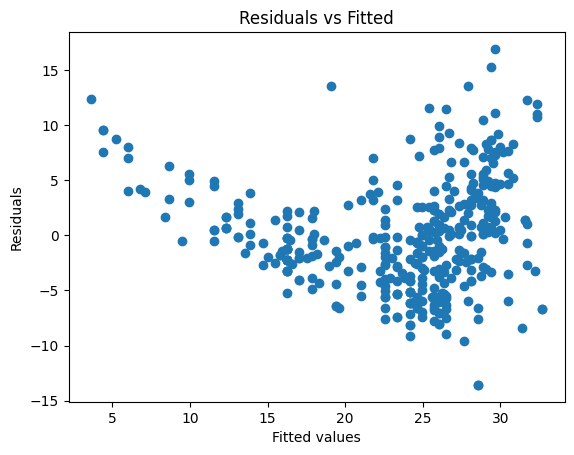

In [7]:
plt.scatter(auto_lr.fittedvalues, auto_lr.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

print(auto_lr.fittedvalues)

In [8]:
auto_lr2 = smf.ols('mpg ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           5.40e-99
Time:                        12:06:17   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

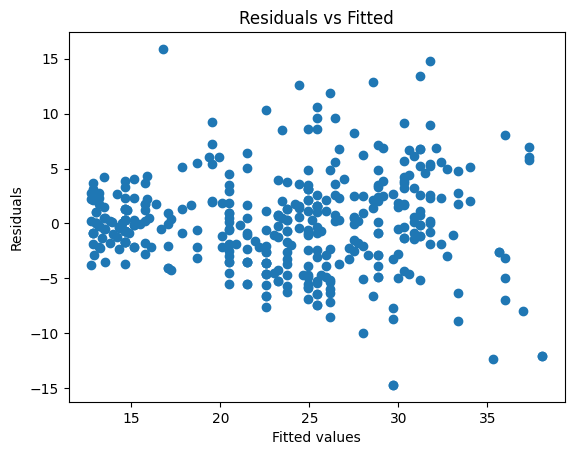

In [9]:
plt.scatter(auto_lr2.fittedvalues, auto_lr2.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

### 2. ทดสอบ independence of errors
2.1 ตรวจสอบโดยการ plot time vs residuals (ถ้าสามารถทำได้)

2.2 ตรวจสอบด้วย Durbin-Wutson test  

H0: There is no correlation among the residuals.  
H1: The residuals are correlated.

The Durbin-Watson statistic ranges in value from 0
to 4. A value near 2 indicates non-correlation; a value toward 0 indicates positive
correlation; a value toward 4 indicates negative correlation.

Reject H0 if d < dL  
Accept H0 if d > dU

Durbin-Watson table: https://www.real-statistics.com/statistics-tables/durbin-watson-table/

In [10]:
auto_lr2 = smf.ols('mpg ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           5.40e-99
Time:                        12:06:24   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

### ดูตาราง Durbin-Watson Alpha = .05 n = 350 และ k = 2

ได้ค่า dL = 1.813 dU = 1.836

ดังนั้น Reject H0 -- มี correlation ระหว่าง residuals

### 3. ทดสอบ constant variance

### ใช้ Breush-Pagan test


H0: The residuals are distributed with equal variance  
H1: The residuals are not distributed with equal variance


In [11]:
import statsmodels.stats.api as sms

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(auto_lr2.resid, auto_lr2.model.exog)
pd.DataFrame({'Name':name, 'value':test})

,Name,value
0,Lagrange multiplier statistic,3.452843e+01
1,p-value,3.178682e-08
2,f-value,1.878689e+01
3,f p-value,1.626798e-08


### p-value < 0.05 ดังนั้น accept H1

In [12]:
auto_lr3 = smf.ols('I(np.log(mpg)) ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr3.summary())

                            OLS Regression Results                            
Dep. Variable:         I(np.log(mpg))   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     532.2
Date:                Sun, 17 Aug 2025   Prob (F-statistic):          4.54e-112
Time:                        12:06:29   Log-Likelihood:                 125.48
No. Observations:                 392   AIC:                            -245.0
Df Residuals:                     389   BIC:                            -233.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4022      0

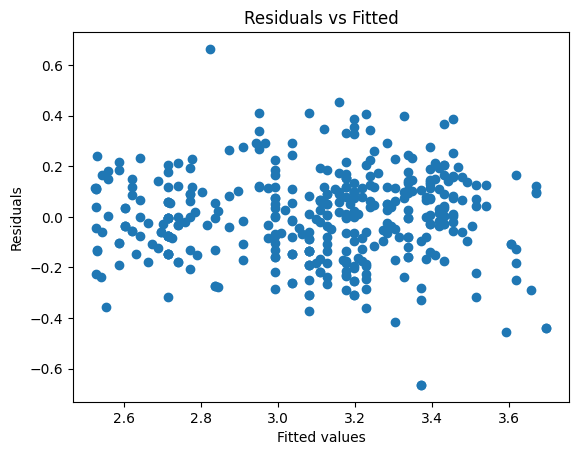

In [13]:
plt.scatter(auto_lr3.fittedvalues, auto_lr3.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

### ลอง Breush-Pagan test อีกครั้ง

In [14]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(auto_lr3.resid, auto_lr3.model.exog)
pd.DataFrame({'Name':name, 'value':test})

,Name,value
0,Lagrange multiplier statistic,5.202329
1,p-value,0.074187
2,f-value,2.615975
3,f p-value,0.074382


### p-value ฬ 0.05 ดังนั้น accept Hจ

### 4., 5. หา outliers และ leverage points

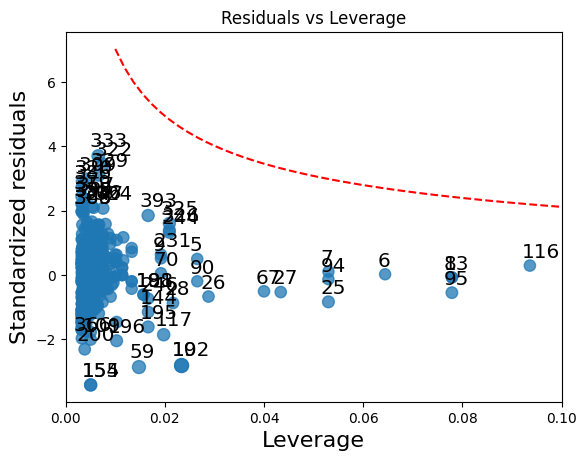

In [15]:
import statsmodels.graphics.api as smg

smg.influence_plot(auto_lr2, size=10)

#Cook's distance line ที่ระดับ 0.5
p = 1 # จำนวนตัวแปรต้น
x = np.linspace(0.01, 0.1, 50)
plt.plot(x, np.sqrt(0.5*p*(1 - x)/x), color='red', linestyle='dashed')

plt.xlim(0,0.1)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage');

### 6. ทดสอบ multicollinearity

ลบตัวแปรที่มีค่า VIF > 10

In [16]:
print(auto_lr3.model.exog)  # matrix of exogenous variables

[[1.0000e+00 1.3000e+02 1.6900e+04]
 [1.0000e+00 1.6500e+02 2.7225e+04]
 [1.0000e+00 1.5000e+02 2.2500e+04]
 ...
 [1.0000e+00 8.4000e+01 7.0560e+03]
 [1.0000e+00 7.9000e+01 6.2410e+03]
 [1.0000e+00 8.2000e+01 6.7240e+03]]


In [17]:
print(auto_lr3.model.exog_names)  # names of exogenous variables

['Intercept', 'horsepower', 'I(horsepower ** 2)']


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

auto_lr4 = smf.ols('I(np.log(mpg)) ~ cylinders \
                                     + displacement \
                                     + horsepower \
                                     + weight \
                                     + acceleration', data=auto).fit()

exog = auto_lr4.model.exog
exog_names = auto_lr4.model.exog_names

for i in range(1,len(exog_names)):
    print(exog_names[i], vif(exog, i))

cylinders 10.6308702529696
displacement 19.53506094748836
horsepower 8.916016566767519
weight 10.43027112753311
acceleration 2.609486629126141


### Exercise

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้
https://donlapark.pages.dev/229351/data/Carseats.csv
หรือรันโค้ดข้างล่าง

In [19]:
# Download the file
!wget https://donlapark.pages.dev/229351/data/Carseats.csv

--2025-08-17 12:06:44--  https://donlapark.pages.dev/229351/data/Carseats.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19044 (19K) [text/csv]
Saving to: ‘Carseats.csv’

Carseats.csv        100%[===================>]  18.60K  --.-KB/s    in 0s      

2025-08-17 12:06:45 (89.3 MB/s) - ‘Carseats.csv’ saved [19044/19044]




Sales

    Unit sales (in thousands) at each location
CompPrice

    Price charged by competitor at each location
Income

    Community income level (in thousands of dollars)
Advertising

    Local advertising budget for company at each location (in thousands of dollars)
Population

    Population size in region (in thousands)
Price

    Price company charges for car seats at each site
ShelveLoc

    A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
Age

    Average age of the local population
Education

    Education level at each location
Urban

    A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US

    A factor with levels No and Yes to indicate whether the store is in the US or not

In [21]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
carseats = pd.read_csv('Carseats.csv')

carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [22]:
all_predictors = '+'.join(carseats.columns.drop('Sales')) #ใช้สูตร 'Sales ~' + all_predictors ในการสร้างโมเดล

'Sales ~ ' + all_predictors

'Sales ~ CompPrice+Income+Advertising+Population+Price+ShelveLoc+Age+Education+Urban+US'

In [23]:
# simple linear regression on Auto dataset
auto_linear = smf.ols('Sales ~ ' + all_predictors, data=carseats).fit()
print(auto_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 17 Aug 2025   Prob (F-statistic):          1.60e-166
Time:                        12:20:46   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

In [24]:
# Fitted values
auto_fitval_ = auto_linear.fittedvalues

# Residuals
auto_resid_ = auto_linear.resid

### 1. ทดสอบ non-linearity

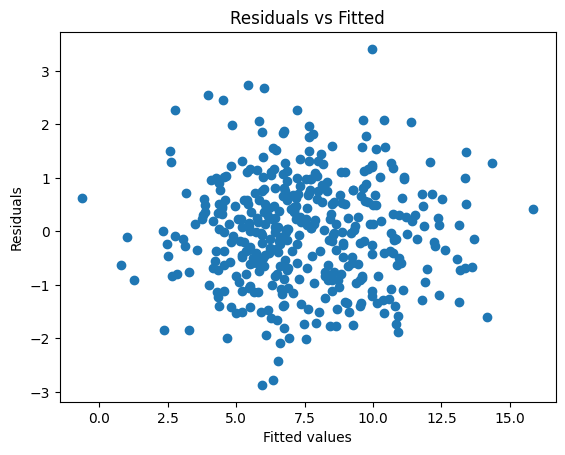

In [25]:
plt.scatter(auto_fitval_, auto_resid_)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

Non-linearity -- ไม่มี pattern โค้ง

### 2. ทดสอบ independence of errors
2.1 ตรวจสอบโดยการ plot time vs residuals (ถ้าสามารถทำได้)

2.2 ตรวจสอบด้วย Durbin-Wutson test  

H0: There is no correlation among the residuals.  
H1: The residuals are correlated.

The Durbin-Watson statistic ranges in value from 0
to 4. A value near 2 indicates non-correlation; a value toward 0 indicates positive
correlation; a value toward 4 indicates negative correlation.

Reject H0 if d < dL  
Accept H0 if d > dU

Durbin-Watson table: https://www.real-statistics.com/statistics-tables/durbin-watson-table/

ดูตาราง Durbin-Watson Alpha = 0.05 n = 350 และ k = 11

ได้ค่า dL = 1.760 dU = 1.890

d = 2.013 > dU

ดังนั้น Accept H0 -- ไม่มี correlation ระหว่าง residuals

### 3. ทดสอบ constant variance

ใช้ Breush-Pagan test


H0: The residuals are distributed with equal variance  
H1: The residuals are not distributed with equal variance

In [26]:
import statsmodels.stats.api as sms

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(auto_linear.resid, auto_linear.model.exog)
pd.DataFrame({'Name':name, 'value':test})

,Name,value
0,Lagrange multiplier statistic,7.328659
1,p-value,0.771878
2,f-value,0.658316
3,f p-value,0.777857


p-value > 0.05 Accept H0 -- residuals มี variance เท่ากัน

### 4. outliers , 5. leverage points

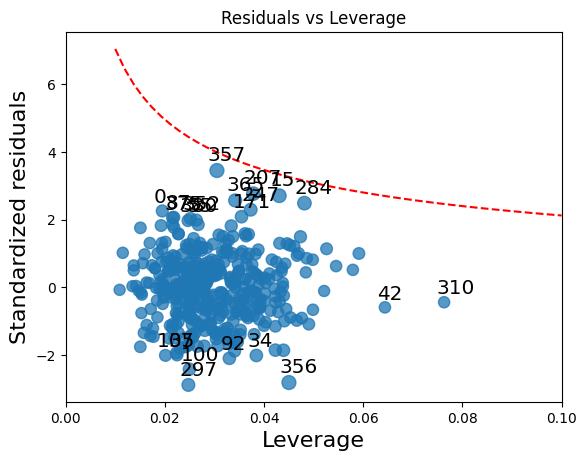

In [27]:
import statsmodels.graphics.api as smg

smg.influence_plot(auto_linear, size=10)

#Cook's distance line ที่ระดับ 0.5
p = 1 # จำนวนตัวแปรต้น
x = np.linspace(0.01, 0.1, 50)
plt.plot(x, np.sqrt(0.5*p*(1 - x)/x), color='red', linestyle='dashed')

plt.xlim(0,0.1)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage');

### 6. ทดสอบ multicollinearity

ลบตัวแปรที่มีค่า VIF > 10

In [28]:
print(auto_linear.model.exog)  # matrix of exogenous variables

[[  1.   0.   0. ... 120.  42.  17.]
 [  1.   1.   0. ...  83.  65.  10.]
 [  1.   0.   1. ...  80.  59.  12.]
 ...
 [  1.   0.   1. ... 159.  40.  18.]
 [  1.   0.   0. ...  95.  50.  12.]
 [  1.   1.   0. ... 120.  49.  16.]]


In [29]:
print(auto_linear.model.exog_names)  # names of exogenous variables

['Intercept', 'ShelveLoc[T.Good]', 'ShelveLoc[T.Medium]', 'Urban[T.Yes]', 'US[T.Yes]', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

auto_linear2 = smf.ols('Sales ~ '+ all_predictors, data=carseats).fit()

exog = auto_linear2.model.exog
exog_names = auto_linear2.model.exog_names

for i in range(1,len(exog_names)):
    print(exog_names[i], vif(exog, i))

ShelveLoc[T.Good] 1.5114108816547631
ShelveLoc[T.Medium] 1.5178815057838553
Urban[T.Yes] 1.0227049034513431
US[T.Yes] 1.980719638938689
CompPrice 1.5546180981239017
Income 1.0247310763870372
Advertising 2.1031356279376445
Population 1.1455343200880395
Price 1.5370677298055464
Age 1.0210506961242922
Education 1.0263422999995275


### Bad = Intercept + other values
### Medium = Intercept + other values + ShelveLoc(Med)*1
### Good = Intercept + other values + ShelveLoc(Good)*1

###จงสร้าง residual plot และ influence plot แล้วตอบคำถามต่อไปนี้

1. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) กับชั้นที่มีคุณภาพต่ำ (ShelveLoc (Bad)) ต่างกันอย่างไร ต่างกันเท่าไหร่

--> ชั้นวางคุณภาพปานกลางทำให้ยอดขายโดยเฉลี่ยของเบาะรถสูงกว่าชั้นวางคุณภาพต่ำ ที่ 1.9567 หน่วย

2. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพดี (ShelveLoc (Good)) กับชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) ต่างกันอย่างไร ต่างกันเท่าไหร่

--> ชั้นวางคุณภาพดีทำให้ยอดขายโดยเฉลี่ยของเบาะรถสูงกว่าชั้นวางคุณภาพปานกลาง ที่ 4.8502 - 1.9567 = 2.8935  หน่วย
3. จงตรวจสอบว่าข้อมูลที่ใช้มีความเหมาะสมกับการสร้าง linear regression หรือไม่ โดยพิจารณาสิ่งต่างๆเหล่านี้พร้อมกับให้เหตุผล  
  3.1 Non-linearity  
  3.2 Independence of errors  
  3.3 Constant variance  
  3.4 Outliers  
  3.5 Leverage points  
  3.6 Multicollinearity

--> ข้อมูลที่ใช้เหมาะสมกับการสร้าง Linear Regression ในภาพรวม แต่ยังมีปัญหา outliers และ leverage points ที่ควรจัดการ